In [2]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
from numpy import random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t, norm, chi2, chi2_contingency

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

## 데이터와 행렬
- 스칼라 값 : 숫자 하나만으로 이루어진 데이터 (문자도 가능)/ 숫자의 크기만 따짐
    - 열과 행의 수가 각각 1인 행렬
- 벡터 : 여러 숫자가 특정한 순서대로 모여 있는 것을 의미. 하나의 벡터를 이루는 데이터 수가 n개이면 n-차원 벡터라고 함/ 방향도 따짐
    - 열의 수가 1인 행렬
<br><br>
- 열벡터는 열의 수가 1인 행렬
- 하나의 데이터 레코드(단위 데이터 하나)를 단독으로 벡터로 나타낼 때는 하나의 열로 나타내고 복수의 데이터 레코드 집합을 행렬로 나타낼 때는 하나의 데이터 레코드가 하나의 행으로 표기하는 것은 데이터 분석에서 일반적인 관례
- 스칼라와 벡터도 수학적으로는 행렬에 속한다.

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()      #3차원 데이터셋

x0 = iris.data[0,0]     #스칼라: 숫자 1개
x1 = iris.data[0,:]     #행백터: 한 행을 가져옴(여러 개의 숫자/ 순서가 있음)
x2 = iris.data[:,0]     #열백터: 한 열을 가져옴(여러 개의 숫자/ 순서가 있음)
print(f"{x0} \n{x1} \n{x2[:10]}")

5.1 
[5.1 3.5 1.4 0.2] 
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9]


In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
df['target'].value_counts()    #target_names 3종류를 숫자로 구분해 놓은 거

0    50
1    50
2    50
Name: target, dtype: int64

In [42]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# 넘파이를 사용한 벡터 표현: 벡터를 열 개수가 하나인 2차원 배열로 표현
# 4차원 벡터, 2차원 배열: 배열의 차원은 벡터의 차원과 다른 의미
x1 = np.array([[5.1],[3.5],[1.4],[0.2]])
x1

array([[5.1],
       [3.5],
       [1.4],
       [0.2]])

In [7]:
# 넘파이는 1차원 배열 객체도 벡터로 인정
# (마찬가지로 4차원 벡터/ 원소의 개수가 4개이므로)
x2 = np.array([5.1,3.5,1.4,0.2])
x2

array([5.1, 3.5, 1.4, 0.2])

In [8]:
# 9차원 벡터 ((3,3)리스트/ 2차원 배열)
x3 = np.array([[1,2,3],[4,5,6],[7,8,9]])
x3

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

- 행렬 : 복수의 차원을 가지는 데이터 레코드가 다시 여러 개 있는 경우의 데이터를 합쳐서 표기한 것
- 붓꽃 예에서 붓꽃 6 송이에 대해 꽃잎과 꽃받침 크기를 측정했다면 4차원 붓꽃 데이터가 6개. 4 x 6 = 24개의 실수 숫자가 있은 것이며 이 숫자 집합을 행렬로 나타낼 수 있다.
- 벡터는 열의 수가 1인 행렬이라고 볼 수 있으므로 열벡터라고도 한다.
- 데이터를 행렬로 묶어서 표시할 때는 붓꽃 하나에 대한 데이터 레코드, 즉 하나의 벡터가 열이 아닌 행으로 표시한다.
- 하나의 데이터 레코드를 단독으로 벡터로 나타낼 때는 하나의 열로 나타내고 복수의 데이터 레코드 집합을 행렬로 나타낼 때는 하나의 데이터 레코드가 하나의 행으로 표기하는 것은 일관성이 없어 보이지만 다른 연산 시 필요하여 데이터 분석에서 쓰는 일반적인 관례임을 유의해야 함

In [9]:
df.head(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4


In [10]:
df.iloc[0,:]   #행 뽑기

#하나의 데이터 레코드를 단독으로 벡터로 나타낼 때는 하나의 열로 나타내고~
# -> 행을 뽑았지만 표기는 열처럼 해줌

sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
Name: 0, dtype: float64

In [11]:
# 전치연산(행과 열을 뒤바꿔줌): 2행3열 -> 3열2행
a = np.array([[11,12,13],[21,22,23]])
print(a)
a.T

[[11 12 13]
 [21 22 23]]


array([[11, 21],
       [12, 22],
       [13, 23]])

In [12]:
# 영벡터
np.zeros((3,1))

array([[0.],
       [0.],
       [0.]])

In [13]:
# 일벡터
np.ones((3,1))

array([[1.],
       [1.],
       [1.]])

In [14]:
# 정방행렬: 행,열 길이가 같음
np.full((3,3),1)
np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [15]:
# 대각 정방행렬: 주대각선 1,3,5 (나머지는 전부 0)
np.diag([1,3,5])

array([[1, 0, 0],
       [0, 3, 0],
       [0, 0, 5]])

In [16]:
# 항등행렬: 주대각선이 전부 1인 정방행렬 (나머지 전부 0)
np.diag([1,1,1])
np.identity(3)
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [17]:
# 벡터와 벡터의 곱셈, 내적
from PIL import Image
image = Image.open('내적.jpg')   # 그림 새 창에 띄우기
image.show()

In [18]:
# <img src ='곱셈.jpg' STYLE='width 800px;'>
# 마크다운에서 이렇게 입력하면 아래처럼 이미지 뜸

<img src ='곱셈.jpg' STYLE='width 800px;'>

X1(5) * (1,3,5) = a1,b1,c1 <br>
X2(10) * (2,4,6) = a2,b2,c2 <br>
=> 결과값: Y1(a1+a2), Y2(b1+b2), Y3(c1+c2)

<img src ='내적.jpg' STYLE='width 800px;'>

방향이 다르면 곱셈이 안됨 -> 그래서 a를 b 방향으로 옮겨줌(정사영 시킴)

- sin(theta(각도)) = 높이(c)/빗변(a)
- cos(theta) = 밑변(b)/빗변(a)
- tan(theta) = 높이(c)/밑변(b)

-> a*b를 해준 다음, 각도에 맞게 sin/cos/tan 해주면 됨

In [19]:
x = np.array([10,11,12,13,14])
y = np.array([0,1,2,3,4])
print(x+y)
print(x-y)

[10 12 14 16 18]
[10 10 10 10 10]


In [20]:
x1 = np.random.randint(30,50,size=(2,2))
x2 = np.random.randint(20,30,size=(2,2))
x3 = np.random.randint(10,20,size=(2,2))
x1+x2-x3

array([[60, 46],
       [39, 48]])

In [21]:
# 브로드캐스팅
x1 = np.array([10,11,12])
x1-10

array([0, 1, 2])

In [22]:
np.dot(3, x1)   #내적계산(행렬곱) (앞에 변수 대신 숫자(3) 들어간 거)

array([30, 33, 36])

In [23]:
# 넘파이에서 벡터와 행렬의 내적은 dot() 또는 @ 연산자로 계산
x = np.array([[1],[2],[3]])   #3행1열
y = np.array([[4],[5],[6]])   #3행1열

print(x.T)    #연산을 위해 한쪽을 전치시킴 (3행1열 -> 1행3열)
print(y)      #둘 중 하나는 반드시 행이 나열된 행벡터여야 함
print()

print(x.T@y)    # @: 행렬내적 계산 (다차원 행렬)
print(np.dot(x.T, y))    # dot: 내적계산 (1차원 배열)

[[1 2 3]]
[[4]
 [5]
 [6]]

[[32]]
[[32]]


In [24]:
x = np.arange(1,7).reshape(2,3)
y = np.array([[6,23], [-1,7], [8,9]])
print(x,'\n')   #2행 3열
print(y)   #3행 2열

np.dot(x,y)
x.dot(y)    #이렇게도 쓸 수 있음
# => 결과는 2행 2열 (2행=x의 행, 2열=y의열)

[[1 2 3]
 [4 5 6]] 

[[ 6 23]
 [-1  7]
 [ 8  9]]


array([[ 28,  64],
       [ 67, 181]])

결과 2행 2열 ->
- 1행 1열: x의 1행(1,2,3)과 y의 1열(6,-1,8)을 각각 곱해서(6,-2,24) 합함(28)
- 1행 2열: x의 1행(1,2,3)과 y의 2열(23,7,9)을 각각 곱해서(23,14,27) 합함(64)
- 2행 1열: x의 1행(4,5,6)과 y의 1열(6,-1,8)을 각각 곱해서(24,-5,48) 합함(67)
- 2행 2열: x의 1행(4,5,6)과 y의 1열(23,7,9)을 각각 곱해서(104,35,54) 합함(181)

#### 행렬곱
- 앞 행렬의 열의 수가 뒤 행렬의 행의 수와 일치해야 한다.
- 교환 법칙이 성립하지 않음 : (A @ B) != (B @ A)
- 분배법칙은 성립함 : A @ (B + C) = A @ B + A @ C
- 전치 연산도 덧셈, 뺄셈에 대한 분배 법칙 성립 : (A + B).T = A.T + B.T
- 전치 연산과 곱셈의 경우에는 분배 법칙이 성립하지만, 전치 연산이 분배되면서 곱셈의 순서가 바뀜 (A @ B).T = (B.T @ A.T) != (A.T @ B.T)

In [25]:
# 항등행렬의 곱셈
a = np.array([[1,2],[3,4]])
i = np.eye(2)    #행 방향(1,0)(1,0)/ 열방향(1,0)(1,0)

print(f"{a} \n{i} \n")

# print(a@i)    # 어느방향(행/열)으로 읽던 i가 같아서 순서상관x
print(i@a)

[[1 2]
 [3 4]] 
[[1. 0.]
 [0. 1.]] 

[[1. 2.]
 [3. 4.]]


[[0.3305785  0.30578512 0.3305785  ... 0.3966942  0.37190083 0.28512397]
 [0.32231405 0.32231405 0.29752067 ... 0.41322315 0.338843   0.2603306 ]
 [0.3264463  0.30991736 0.30578512 ... 0.40495867 0.36363637 0.27272728]
 ...
 [0.16115703 0.16528925 0.1570248  ... 0.14049587 0.1570248  0.16115703]
 [0.1570248  0.17768595 0.16115703 ... 0.14049587 0.1570248  0.1570248 ]
 [0.17768595 0.1694215  0.16528925 ... 0.1446281  0.15289256 0.15289256]] 



Text(0.5, 1.0, 'image 1: $x_1$')

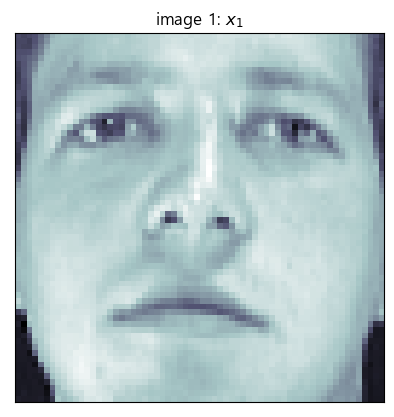

In [26]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print(faces.images[6],'\n')   #해당 이미지를 이루는 픽셀 정보값

f,ax = plt.subplots(1,1)
ax.imshow(faces.images[6], cmap=plt.cm.bone)

ax.grid(False)     #격자 표시 제거
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('image 1: $x_1$')

Text(0.5, 1.0, 'image 1: $x_1$')

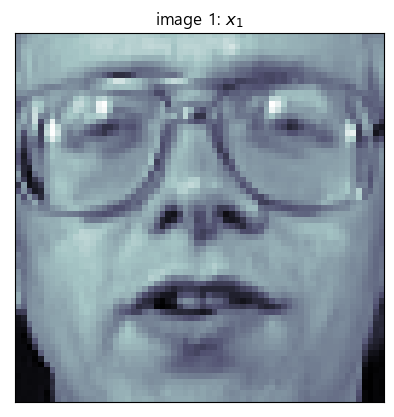

In [27]:
f,ax = plt.subplots(1,1)
ax.imshow(faces.images[10], cmap=plt.cm.bone)

ax.grid(False) 
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('image 1: $x_1$')

Text(0.5, 1.0, 'image 3: $0.7x_1 + 0.3x_2$')

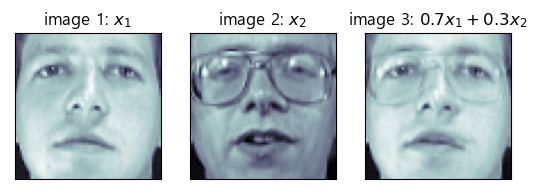

In [28]:
faces = fetch_olivetti_faces()

f,ax = plt.subplots(1,3)

ax[0].imshow(faces.images[6], cmap=plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('image 1: $x_1$')

ax[1].imshow(faces.images[10], cmap=plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('image 2: $x_2$')

new_face = (0.7*faces.images[6]) + (0.3*faces.images[10])
ax[2].imshow(new_face, cmap=plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title('image 3: $0.7x_1 + 0.3x_2$')

#### 벡터의 norm이란 
- 벡터의 크기를 측정하는 방법 중 하나입니다. 벡터의 norm은 일반적으로 벡터의 길이 또는 크기를 의미합니다. 벡터의 norm은 벡터의 요소에 대한 제곱 합의 제곱근으로 계산됩니다. (싹 다 제곱해서 더한 다음 루트)

만약, 벡터 $x = (x_1, x_2, ..., x_n)$ 이 있다면, $x$의 norm은 다음과 같이 정의됩니다.

$$||x|| = \sqrt{x_1^2 + x_2^2 + \cdots + x_n^2}$$

여기서 $||x||$는 벡터 $x$의 norm을 나타냅니다.

- 벡터의 norm은 다음과 같은 성질을 가지고 있습니다.

  - $||x|| \geq 0$ (벡터의 norm은 항상 0 이상입니다.)
  - $||x|| = 0$ if and only if $x = \mathbf{0}$ (벡터의 norm이 0일 경우, 해당 벡터는 영 벡터입니다.)
  - $||ax|| = |a| \cdot ||x||$ (스칼라 $a$에 대해 벡터 $x$의 norm은 $a$의 절댓값과 $x$의 norm의 곱과 같습니다.)
  - $||x+y|| \leq ||x|| + ||y||$ (두 벡터의 합의 norm은 각 벡터의 norm의 합보다 작거나 같습니다. 이를 삼각 부등식이라고 합니다.) <br><br>
- 벡터의 norm은 선형 대수학에서 매우 중요한 개념이며, 벡터 공간에서 거리와 관련된 개념을 다룰 때 자주 사용됩니다.

- 위 4가지 성질을 만족하기만 하면 놈이라고 할 수 있는데, 많이 사용되는 놈은 다음 세 가지이다. 놈을 구별하기 위하여 아래 첨자를 사용하고, $||x||_1을 1-놈, ||x||_2 를 2-놈, ||x||_\infty를 3-놈$이라고 한다.
- 1-놈은 벡터 x의 성분의 절대값을 모두 더한 것으로, 2-놈은 벡터의 기하학적 길이로, $\infty-놈$은 벡터 성분 중에서 크기가 제일 큰 값으로 정의한다.
- p = 2인 경우가 가장 많이 쓰이므로 p값 표기가 없는 경우 p=2인 프로베니우스 놈을 사용한다.

https://bskyvision.com/825  
https://pasus.tistory.com/34

#### L1 norm: 절대값의 합
벡터의 각 요소의 절댓값을 모두 더한 값으로, 벡터의 원소들의 절댓값의 합을 의미합니다. 예를 들어, 2차원 벡터 (3, -4)의 L1 norm은 |3| + |-4| = 7입니다.

#### L2 norm: 피타고라스 방정식(대각선 거리)
벡터의 각 요소의 제곱을 모두 더한 값을 제곱근으로 구한 값으로, 벡터의 원소들의 제곱의 합의 제곱근을 의미합니다. 예를 들어, 2차원 벡터 (3, -4)의 L2 norm은 √(3^2 + (-4)^2) = 5입니다.<br>
가장 많이 쓰이는 norm. p값 표기가 따로 없는 경우 디폴트로 사용됨.

#### L∞ norm: 가장 큰 절대값
요소들 중에서 절댓값이 가장 큰 값을 나타내는 벡터의 크기 혹은 길이를 의미합니다. 예를 들어, 3차원 벡터 (1, -5, 3)의 L∞ norm은 |-5| = 5입니다. 

In [29]:
a = (np.arange(9)-4).reshape(3,3)
a

array([[-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4]])

In [30]:
# 선형대수학(Linear algebra)
np.linalg.norm(a)

7.745966692414834

In [31]:
# norm
x=[2,3]
print(np.linalg.norm(x, 1))    # L1 norm 사용(요소들의 합)
print(np.linalg.norm(x, 2))    # L2 norm 사용(피타고라스 정리)
print(np.linalg.norm(x, np.inf))    # L∞ norm 사용(가장 큰 절댓값)

5.0
3.605551275463989
3.0


#### 행렬식(determinant)은
행렬식은 정방행렬에 대해서만 정의되는 값으로, 행렬의 성질(선환변형에 대한 부피변화율)을 나타내는 중요한 값 중 하나입니다. 

- 행렬식은 행렬의 크기에 상관없이 항상 하나의 스칼라값으로 계산됩니다.
행렬 A의 행렬식은 $|A|$ 또는 det(A)로 표기합니다. 2x2 행렬의 경우, 다음과 같이 행렬식을 계산할 수 있습니다.$$det(A) = a11*a22 - a12*a21$$
<br>
- 행렬식의 결과를 가지고 역향렬의 존재여부를 탐색할 수 있음
- 행렬식이 0이면, 해당 행렬은 역행렬을 가지지 않습니다.
- 반대로, 행렬식이 0이 아니면, 해당 행렬은 역행렬을 가지며, 선형 변환의 크기와 방향을 보존하는 역행렬을 사용하여 역변환을 수행할 수 있습니다.
<br><br>
- 행렬식의 절댓값==1 인 행렬
: 크기를 보존하는 선형 변환을 나타내며, 이러한 행렬은 회전 또는 반사와 같은 변환이 될 수 있습니다. 
- 행렬식의 절댓값 <= 1 인 행렬
: 크기를 축소하는 선형 변환이며, 이러한 행렬은 변환 중심을 기준으로 축소가 됩니다.
- 행렬식의 절댓값 >= 1 인 행렬
: 크기를 확대하는 선형 변환을 나타내며, 이러한 행렬은 변환 중심을 기준으로 확대됩니다.
<br><br>
- 행렬식은 선형 방정식의 해를 구하는 데에도 사용됩니다 $Ax = b$에서 A는 n x n 행렬이며, x와 b는 n 차원 벡터입니다.
- 만약 A의 행렬식이 0이 아니면, 이 방정식은 유일한 해(대응되는 값이 1개)를 가집니다. 그러나, A의 행렬식이 0이면(역행렬이 없으면), 이 방정식은 무수히 많은 해를 가질 수 있습니다.
- 행렬식은 행렬식이 0이 아닌 행렬에 대한 Cramer의 법칙을 사용하여 역행렬을 구하는 데에도 사용됩니다. 역행렬은 선형 방정식의 해를 구하는 데 사용될 수 있으며, 행렬식이 0이 아닌 경우에만 존재합니다.

#### 선형변환
- 벡터 공간에서 한 벡터를 다른 벡터로 변환하는 선형 연산(벡터의 크기와 방향을 유지하면서 벡터를 변환시킴)
- 선형성을 유지하는 연산
- 함수와 비슷한 개념 -> 입력값을 넣었을 때 어떠한 행렬에 의해 '변환'을 거쳐 결과값이 나오는 것

#### 선형성을 만족하는 조건
- 덧셈에 대해 닫혀 있어야 합니다. 즉, 두 벡터를 더한 결과 역시 벡터 공간 내에 존재해야 합니다.
- 스칼라배에 대해 닫혀 있어야 합니다. 즉, 어떤 벡터에 스칼라 값을 곱한 결과 역시 벡터 공간 내에 존재해야 합니다.
- 분배법칙이 성립해야 합니다. 즉, 벡터와 벡터의 합에 대해 스칼라를 곱하거나, 벡터를 스칼라로 곱한 후 더한 결과가, 먼저 벡터 간의 합을 구한 후 스칼라를 곱한 결과와 같아야 합니다.
- 영벡터(zero vector)에 대해 선형성이 성립해야 합니다. 즉, 어떤 벡터에 영벡터를 곱한 결과는 항상 영벡터가 되어야 합니다.

#### 특징 3가지
- 벡터의 덧셈과 스칼라 곱에 대해 분배법칙이 성립합니다.
- 두 벡터의 합의 선형변환은 각각의 벡터를 선형변환한 후에 합하는 것과 같습니다.
- 어떤 벡터를 스칼라로 곱한 후 선형변환하는 것은 스칼라와 선형변환을 교환할 수 있습니다.

#### 역행렬
Ax = b : 계수행렬(A), 미지수벡터(x), 상수벡터(b)
- A, x, b가 스칼라 실수인 경우 : x = b/A 
- 행렬에서는  나눗셈 대신 역행렬 사용 : x = $A^{-1}$b

In [32]:
# 역행렬은 특정한 행렬과 곱했을 때 항등행렬(대각선1, 나머지0인 행렬)이 나오는 행렬
a = np.array([[1,2],[3,4]])    #역행렬을 구할 행렬
a_inv = np.linalg.inv(a)       #a의 역행렬 계산
print(a_inv)

(a @ a_inv).round(2)   #항등행렬이 나옴(역행렬 검증)
# [1, 0],
# [0, 1]

[[-2.   1. ]
 [ 1.5 -0.5]]


array([[1., 0.],
       [0., 1.]])

In [33]:
# 역행렬 확인 -> 항등행렬이 나옴
np.random.seed(0)
m1 = np.random.randint(1,4, size=(3,3))
m2 = np.linalg.inv(m1)
print(f"{m1}\n\n{m2}\n")

m3 = m1 @ m2
print(m3)

[[1 2 1]
 [2 2 3]
 [1 3 1]]

[[ 7. -1. -4.]
 [-1.  0.  1.]
 [-4.  1.  2.]]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [34]:
# 역행렬이 존재하지 않는 경우는 행렬식 값==0
n1 = np.array([[1,2],[2,4]])
n2 = np.linalg.det(n1)
print(f"{n1}\n\n행렬식: {n2}\n")

[[1 2]
 [2 4]]

행렬식: 0.0



In [35]:
# 역행렬이 존재하는 경우는 행렬식 값!=0
m4 = np.linalg.det(m1)
print(f"행렬식: {m4}")

행렬식: -1.0


<img src ='행렬식계산.png' STYLE='width 800px;'>

(a[0,0] * a(1행1열 제외한 나머지)) - (a[0,1] * a(1행2열 제외한 나머지)) + (a[0,2] * a(1행 3열 제외한 나머지))

In [36]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a)

np.linalg.det(a)   #행렬식 함수

[[1 2 3]
 [4 5 6]
 [7 8 9]]


0.0

#### 행렬식 계산 (1,2,3 기준)
: 꼭 (1,2,3)기준이 아니어도 됨. (4,5,6)이나 (7,8,9)여도 됨

1*[[5,6][8,9]] + 2*[[4,6],[7,9]] + 3[[4,5],[7,8]] <br>
= (45-48) - (36-42) + (32-35)  //대각선끼리 곱해서 빼기(위에 그림 참고) <br>
= -3 - (-6) + (-3) <br>
= -3+6-3 <br>
= 0

#### 선형예측모형
: 입력데이터 벡터와 가중치 벡터의 내적으로 계산된 예측값이, 실제 출력 데이터와 유사한 값을 출력하도록 하는 모형
- 선형예측모형을 통해, 새로운 독립 변수 값이 주어졌을 때 종속 변수의 값을 예측할 수 있습니다. 

<img src ='인공신경망.png' STYLE='width 800px;'>

(가중치 계산 -> 인공신경망을 구성할 때 각 신경별로 받아들이는 정도가 다를 것이므로, 각 감각기관에 서로 다른 가중치를 부여해 최적화함)

#### 행렬식은 선형 변환의 기하학적 특성을 나타내는 중요한 개념 중 하나

- 선형 변환: 벡터 공간에서 하나의 벡터를 다른 벡터로 옮기는 함수입니다. 이 때, 선형 변환은 벡터 공간의 모양을 변경시키지 않습니다.

- 행렬식: 이러한 선형 변환의 기하학적 특성 중 하나인 스케일링 및 회전을 나타냅니다.
    - 스케일링: 벡터를 크기만 변경시키는 변환
    - 회전: 벡터를 방향을 변경시키는 변환
<br><br>
- 행렬식은 선형 변환을 수행하는 행렬의 크기 변화를 나타내며, 변환 후의 공간의 부피를 결정합니다.
    - 행렬식이 1보다 크면 공간이 확대되고,
    - 행렬식이 1보다 작으면 공간이 축소됩니다.
    - 행렬식==0이면 선형 변환은 벡터 공간의 모양을 변경시키지 않습니다.

- 2차원 평면에서 2배 확대하는 선형 변환을 수행하는 행렬의 행렬식==2이며,
- 90도 회전하는 선형 변환을 수행하는 행렬의 행렬식==-1입니다. <br><br>
- 이러한 기하학적 의미는 컴퓨터 그래픽스, 물리학, 공학 등 다양한 분야에서 활용됩니다.
    - 90도 회전하는 선형 변환을 수행하는 행렬의 행렬식이 -1이라는 것은, 이 변환이 공간의 부피를 음수로 변경시킨다는 의미
    - 이러한 회전 변환이 적용되면, 양의 방향과 반대 방향으로 공간이 뒤집히게 되어 음수의 부피가 생기는 것
    -  정사각형을 90도 회전하는 선형 변환을 적용하면, 정사각형은 기존과는 반대 방향으로 뒤집히게 됩니다. 이렇게 뒤집힌 정사각형은 양의 방향으로는 측정할 수 없는 음수의 부피를 가지게 됩니다.
    
 행렬식의 기하학적 의미 : https://angeloyeo.github.io/2019/08/06/determinant.html

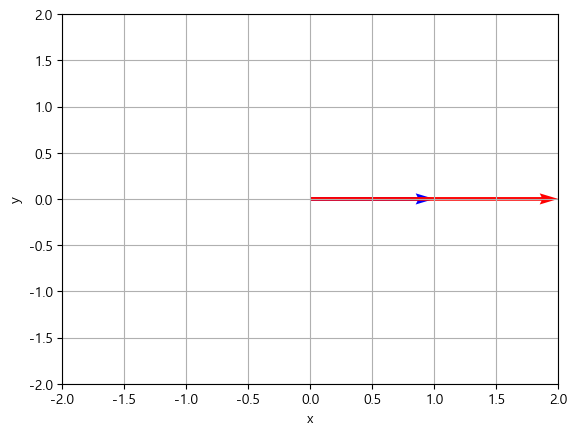

In [50]:
# 변환 전의 기준벡터
v = np.array([1,0])

# 선형변환 행렬
A = np.array([[2,0],[0,1]])

# 변환 후의 벡터
Av = np.dot(A,v)

# 그래프 그리기
fig, ax = plt.subplots()

# 변환 전 벡터 그리기
ax.quiver([0], [0], v[0], v[1], color='b', angles='xy', scale_units='xy', scale=1)

# 변환 후 벡터 그리기
ax.quiver([0], [0], Av[0], Av[1], color='r', angles='xy', scale_units='xy', scale=1)

# 축 설정
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()
plt.show()

In [57]:
A = np.array([[2,0],[0,1]])
det_A = np.linalg.det(A)

A, det_A    #행렬식==2 -> 면적이 2배가 된다는 뜻(0,0을 기준으로)

(array([[2, 0],
        [0, 1]]),
 2.0)

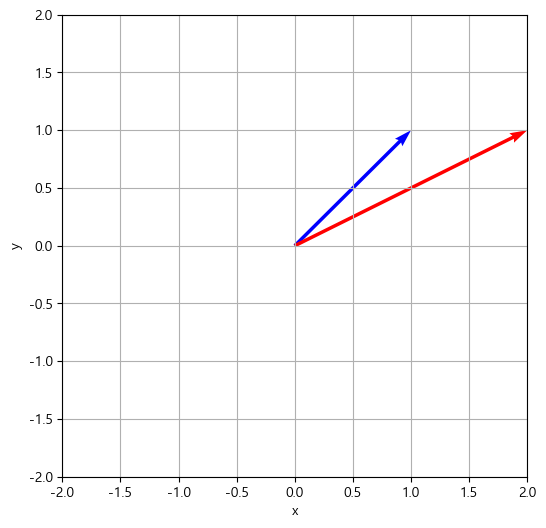

In [61]:
# 변환 전의 기준 벡터
v = np.array([1,1])

# 선형 변환 행렬
A = np.array([[2,0],[0,1]])

# 변환 후의 벡터
Av = np.dot(A,v)

# 그래프 그리기
fig, ax = plt.subplots(figsize=(6,6))

# 변환 전 벡터 그리기
ax.quiver([0], [0], v[0], v[1], color='b', angles='xy', scale_units='xy', scale=1)

# 변환 후 벡터 그리기
ax.quiver([0], [0], Av[0], Av[1], color='r', angles='xy', scale_units='xy', scale=1)


# 축 설정
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()
plt.show()

# 선형 변환 후 면적이 2배가 됨

In [62]:
A = np.array([[2,0],[0,1]])

print(A,'\n')
det_A = np.linalg.det(A)
print(det_A)

# 정방행렬의 행렬식을 계산해주는 함수입니다.

# 정방행렬의 행렬식은 해당 행렬이 선형 변환을 통해 얼마나 공간을 확대/축소하는지, 
# 또는 얼마나 공간을 회전시키는지 등을 나타내는 중요한 값 중 하나이다.

[[2 0]
 [0 1]] 

2.0


#### np.dot과 np.matmul의 차이

- np.dot() 함수는 두 개의 배열을 인수로 받아서 내적(dot product)을 반환합니다. 내적은 두 배열의 대응하는 요소끼리 곱한 값을 모두 더한 것입니다. 즉, 두 배열이 1D 배열인 경우에는 벡터의 내적을 계산하고, 두 배열이 2D 배열인 경우에는 행렬 곱셈을 계산합니다. 이때 두 배열의 차원 수가 다르면 np.dot() 함수는 인수를 전치(transpose)하여 계산

- np.matmul() 함수도 두 개의 배열을 인수로 받아서 행렬 곱셈을 반환합니다. 그러나 np.matmul() 함수는 3D 이상의 배열에 대해서도 계산이 가능합니다. 이때 np.matmul() 함수는 마지막 두 차원에 대해서만 행렬 곱셈을 수행

- np.matmul() 함수는 첫 번째 배열의 마지막 차원(4)과 두 번째 배열의 두 번째 차원(4)을 곱하여 (2, 3, 3) 크기의 배열을 반환합니다.
따라서, np.dot() 함수는 두 배열이 1차원 배열이거나 2차원 배열인 경우에 사용하고, np.matmul() 함수는 두 배열이 2차원 이상인 경우에 사용

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=cjh226&logNo=221356884894

#### np.matmul
- A배열의 마지막 축과 B배열의 끝에서 두 번째 축이 일치해야 합니다.
- 두 배열은 모두 2 차원 이상이어야 합니다.
- 두 배열의 형상이 같아야 합니다(전체 차원의 수와, 각 차원의 크기가 같아야 함)
- 형상이 다른 두 배열의 경우, 브로드캐스팅을 통해 함수가 실행됩니다. (단, 이때 결과값의 안정성을 보장하지는x)

In [60]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[7,8],[9,10],[11,12]])

print(np.dot(a,b))
print(np.matmul(a,b))
# 2차원 이하에선 결과가 같음

[[ 58  64]
 [139 154]]
[[ 58  64]
 [139 154]]


In [65]:
# 첫번째 배열의 마지막 차원(4)과 두번째 배열의 두번째 차원(4)을 곱하여
# (2,3,3) 크기의 배열을 반환
# a의 마지막 차원과 b의 2번째 차원이 같아야 함

a = np.random.rand(2,3,4)
b = np.random.rand(2,4,3)

print(f"dot: \n{np.dot(a,b)}")    # (2,3,2,3) 배열
print(f"matmul: \n{np.matmul(a,b)}")     # (2,3,3) 배열
# 3차원 이상부턴 결과가 다르게 나옴

dot: 
[[[[1.12249702 0.87320088 0.91249548]
   [1.36783759 1.18582109 1.43362093]]

  [[1.36350216 1.00992384 1.04400778]
   [1.94002893 1.38771518 1.82200745]]

  [[1.31214344 0.98261192 1.15945369]
   [1.37001972 1.30442385 1.43970593]]]


 [[[1.78583305 1.30693123 1.52309257]
   [2.08850762 1.70671664 2.02416985]]

  [[1.65933494 1.26316837 1.42468675]
   [1.83644015 1.64608605 1.9109285 ]]

  [[0.74774868 0.41310007 0.58395341]
   [1.22401285 0.70738118 0.88709034]]]]
matmul: 
[[[1.12249702 0.87320088 0.91249548]
  [1.36350216 1.00992384 1.04400778]
  [1.31214344 0.98261192 1.15945369]]

 [[2.08850762 1.70671664 2.02416985]
  [1.83644015 1.64608605 1.9109285 ]
  [1.22401285 0.70738118 0.88709034]]]


#### 과제(1). 아래에 언급한 사항들의 사례를 작성해서 의미를 확인하고 설명하세요.

<행렬곱>
1. 앞 행렬의 열의 수가 뒤 행렬의 행의 수와 일치해야 한다.
2. 교환 법칙이 성립하지 않음 : (A @ B) (B @ A)
3. 분배법칙은 성립함 : A @ (B + C) = (A @ B) + (A @ C)
4. 전치 연산도 덧셈, 뺄셈에 대한 분배 법칙 성립 : (A + B).T = A.T + B.T
5. 전치 연산과 곱셈의 경우에는 분배 법칙이 성립하지만, 전치 연산이 분배되면서 곱셈의 순서가 바뀜 (A @ B).T vs B.T @ A.T

In [49]:
a = np.array([[1,2,3],[4,5,6]])    #2행3열
b = np.array([[10,11],[12,13],[14,15]])   #3행2열
c = np.array([[10,11],[12,13]])   #2행2열
d = np.array([[16,17],[18,19],[20,21]])   #3행2열

print(f"1번: 앞 행렬의 열과 뒤 행렬의 행 수가 일치해야 함")
print(f"{a@b}\n")
# print(f"{a@c}")      # 앞행렬의 열과 뒤행렬의 행 수가 일치하지x

print(f"2번: 두 행렬의 순서를 바꿔 곱했을 때 결과가 같지 않을 수 있음")
print(f"{a@b}  -> a@b \n{b@a}  -> b@a \n")

print(f"3번: 행렬곱 분배법칙 가능: a@(b+d) = a@b + a@d")
print(f"{a@(b+d)}\n")

print(f"4번: 전치연산 분배법칙 가능: (b+d).T = b.T + d.T")
print(f"{(b+d).T}\n")

print(f"5번: 행렬곱+전치연산 분배법칙 -> 곱셈 순서 바뀜: (a@b).T vs b.T@a.T")
print(f"{(a@b).T}  -> (a@b).T\n")
print(f"{(a@b)}  -> (a@b)\n")
print(f"{b.T@a.T}  -> b.T@a.T\n")
print(f"{a.T@b.T}  -> a.T@b.T")
# 행렬곱을 먼저 한 후, 결과값을 전치해서 행과 열을 뒤집음
# 행렬곱은 순서에 따라 결과값이 달라지므로 b.T@a.T 와 a.T@b.T의 값은 같지 않음

1번: 앞 행렬의 열과 뒤 행렬의 행 수가 일치해야 함
[[ 76  82]
 [184 199]]

2번: 두 행렬의 순서를 바꿔 곱했을 때 결과가 같지 않을 수 있음
[[ 76  82]
 [184 199]]  -> a@b 
[[ 54  75  96]
 [ 64  89 114]
 [ 74 103 132]]  -> b@a 

3번: 행렬곱 분배법칙 가능: a@(b+d) = a@b + a@d
[[188 200]
 [458 488]]

4번: 전치연산 분배법칙 가능: (b+d).T = b.T + d.T
[[26 30 34]
 [28 32 36]]

5번: 행렬곱+전치연산 분배법칙 -> 곱셈 순서 바뀜: (a@b).T vs b.T@a.T
[[ 76 184]
 [ 82 199]]  -> (a@b).T

[[ 76  82]
 [184 199]]  -> (a@b)

[[ 76 184]
 [ 82 199]]  -> b.T@a.T

[[ 54  64  74]
 [ 75  89 103]
 [ 96 114 132]]  -> a.T@b.T


#### 과제(2): 아래 두 행렬을 생성해서 각각 a1, b1으로 저장하고 행렬 내적을 계산한 결과를 출력하세요

- a1 = [[1,2,3],[4,5,6]]
- b1 = [[10,11],[12,13],[14,15]]

In [38]:
a1 = np.array([[1,2,3],[4,5,6]])    #2행3열
b1 = np.array([[10,11],[12,13],[14,15]])   #3행2열
# 행렬곱을 하려면 a1의 열과 b1의 행의 길이가 같아야 함

# 내적계산(np.dot): 두 벡터간의 곱 (단, 1차원 배열인 경우만)
# 행렬 내적계산(@): 두 벡터간의 곱 (2차원 이상의 행렬)

print(f"{a1}\n\n{b1}")
a1@b1     #리스트로는 연산 불가x 배열로 변환

[[1 2 3]
 [4 5 6]]

[[10 11]
 [12 13]
 [14 15]]


array([[ 76,  82],
       [184, 199]])

#### 과제(3): 아래 행렬식이 왜 에러가 나는지, e행렬을 수정하여 다음 사항을 수행하세요.

e = np.array([[1,0,0],[0,1,0]]) <br>
np.linalg.det(e)

- 행렬식을 계산하세요
- 역행렬을 구하세요
- 역행렬이 맞는지 검증하세요 (항등행렬과의 곱이 원래의 행렬과 같은지 확인)

In [39]:
e1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
print(f"e: \n{e1}\n")
print(f"행렬식: {np.linalg.det(e1)}")
# linalg.det 는 정방행렬(n,n행렬)에만 사용가능

e2 = np.linalg.inv(e1)
print(f"역행렬: \n{e2}")
print(f"역행렬이 맞는지 확인: \n{e1@e2}")

e: 
[[1 0 0]
 [0 1 0]
 [0 0 1]]

행렬식: 1.0
역행렬: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
역행렬이 맞는지 확인: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


#### 과제(1): 5차원 배열 2개를 생성하여 행렬곱을 계산하세요.

In [85]:
a = np.random.rand(2,1,4,2,3)
b = np.random.rand(2,3,4,3,2)
c = np.matmul(a,b)
print(f"행렬곱한 결과(형상): {c.shape}\n")
print(c)

# 5차원 행렬의 경우 결과값의 형상이 1~3차원까지는 같고,
# (이때 두 배열의 1~3차원의 크기가 같지 않으므로 브로드캐스팅 됨,
#  더 높은 차원 쪽(2,3,4)을 따름)
# 4차원은 a의 4번째 차원(2), 5차원은 b의 마지막 차원(2) 값이 나옴
# => (2,1,4,2,3)*(2,3,4,3,2) = (2,3,4,2,2)

# 4차원 배열도 마찬가지
# 맨 뒤 2개 행렬에 따라 결과값의 형상이 정해짐
# 1~2차원은 동일하게, 3차원은 a의 3차원 크기, 4차원은 b의 마지막 차원 크기

행렬곱한 결과(형상): (2, 3, 4, 2, 2)

[[[[[0.2463207  0.10736364]
    [0.80393045 0.38913102]]

   [[0.78880888 0.83342411]
    [0.65538914 0.752829  ]]

   [[1.21209944 1.22534586]
    [0.82071189 1.21139017]]

   [[1.47491751 0.58954027]
    [0.48971815 0.33387888]]]


  [[[0.51752877 0.45843956]
    [1.21475312 1.44320389]]

   [[0.17361592 0.51524863]
    [0.14209454 0.45679233]]

   [[0.26400696 0.97697797]
    [0.37054129 0.8282029 ]]

   [[0.5085619  1.48043069]
    [0.58074799 1.07001818]]]


  [[[0.42471655 0.15501805]
    [1.1068181  0.92018823]]

   [[0.83575425 0.97798032]
    [0.69466745 0.76183992]]

   [[1.33714412 1.00428668]
    [0.94639052 0.78800642]]

   [[1.40225127 1.27857807]
    [1.08019317 0.41992771]]]]



 [[[[0.88125624 0.98340387]
    [1.3788316  1.30172391]]

   [[0.29803734 0.38139876]
    [1.16909421 1.41831626]]

   [[0.2978847  0.70638001]
    [0.81425508 1.36882523]]

   [[0.76343104 0.85436477]
    [0.75419897 0.792176  ]]]


  [[[0.39772042 1.17795295]
    

#### 문제(1): 다음을 수행하세요.
1. np.arange(9)로 구성된 정방행렬
2. 주대각선 원소가 [1,2,3]인 정방행렬
3. 3행3열로 구성된 항등행렬(단위행렬)
4. 3행1열로 구성된 영벡터

In [100]:
a = np.arange(9).reshape(3,3)
print(a,'\n')

b = np.diag([1,2,3])
print(b,'\n')

c = np.identity(3)
c = np.eye(3)
print(c,'\n')

d = np.full((3,1),0)
d = np.zeros((3,1))
print(d,'\n')

[[0 1 2]
 [3 4 5]
 [6 7 8]] 

[[1 0 0]
 [0 2 0]
 [0 0 3]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

[[0.]
 [0.]
 [0.]] 



#### 문제(2): mt1행렬에 대해 다음을 수행하세요
1. 역행렬 mt2를 구하고, 
2. mt1과 mt2를 내적하여 단위행렬을 출력

In [75]:
np.random.seed(0)
mt1 = np.random.randint(1,4,size =(3,3))
mt2 = np.linalg.inv(mt1)    #역행렬
print(f"역행렬: \n{mt2}\n")
print(f"내적 단위행렬: \n{mt1 @ mt2}")    #내적계산1
#내적계산2: np.dot(mt1,mt2)

역행렬: 
[[ 7. -1. -4.]
 [-1.  0.  1.]
 [-4.  1.  2.]]

내적 단위행렬: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### 문제(3): 행렬식의 기하학적 성질은 부피를 의미하며 2* 2 행렬 A의 행렬식은 일종의 넓이로 이해할 수 있다.
- [[2,0],[0,2]] 배열에 대하여 행렬식을 이용하여 면적을 구하세요.

In [77]:
a = np.array([[2,0],[0,2]])
a_inv = np.linalg.det(a)    #행렬식
a_inv

# 원래 면적(2*2) x 행렬식(4) = 스케일링 후 넓이(16)

4.0